In [1]:
#!/usr/bin/env python
#
import numpy as np
import sys
from numpy import array
from numpy import genfromtxt
import matplotlib.pyplot as plt
#
X= genfromtxt('landscape.csv', delimiter=',')
d = 2	# 2 dimensional data
n = 3200
Ձπ = 2*np.pi
#
#	Isotropic Gaussian
def N(x, μ):
	σ = 0.5
	normalization = (Ձπ * σ**2) ** (d / 2)  # Normalization constant
	return (np.exp(-0.5 * (x - μ).T.dot(x - μ) / σ**2) / normalization).item()
#

p(x) from kde

In [2]:
def p(x):
	prob = 0
	for μ in X:	# add up all the Gaussian
		μ = μ.reshape((2,1))
		prob += N(x, μ)
	return prob/n
#

Create a grid of points in 2D space

In [3]:
xₗ = np.linspace(-5, 5, 100)
xշ = np.linspace(-5, 5, 100)
xշ, xₗ = np.meshgrid(xₗ, xշ)
#
z = np.zeros_like(xₗ)
for i in range(xₗ.shape[0]):
	sys.stdout.write(f"\rProgress: [{'=' * int(i // 2):<50}] {i:.1f}%")
	for j in range(xշ.shape[1]):
		x = array([xₗ[i, j], xշ[i, j]]).reshape((2,1))
		z[i, j] = p(x)
#

Progress: [================================================= ] 99.0%

<br>
Plot the 3D surface

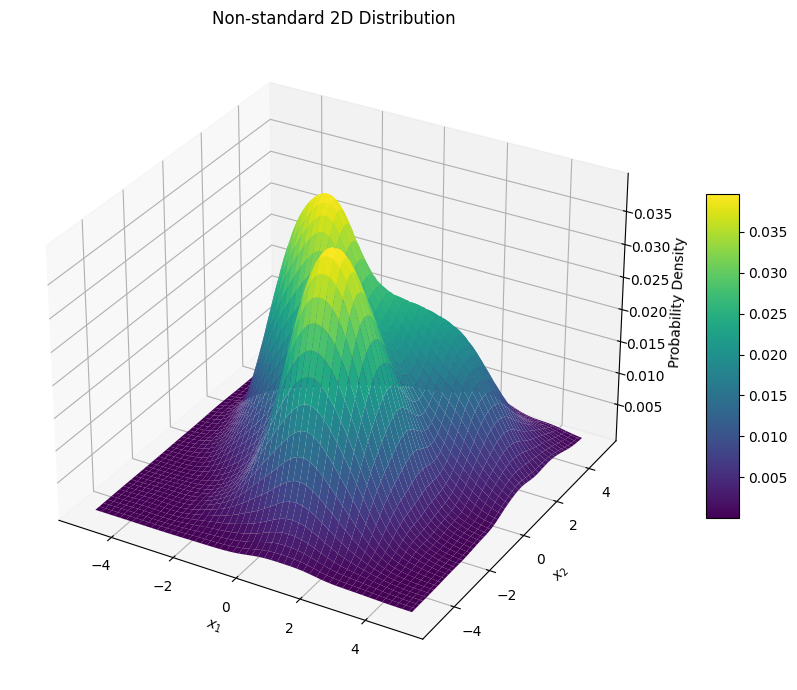

In [4]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
#
# Plot the surface
surf = ax.plot_surface(xₗ, xշ, z, cmap='viridis', edgecolor='none')
#
# Add labels and title
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('Probability Density')
ax.set_title('Non-standard 2D Distribution')
#
# Add a color bar
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=10)
#
# Show the plot
plt.tight_layout()
plt.show()
#